In [1]:
import tensorflow as tf

from keras.models import load_model

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os, random

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'C:/Users/ET02949/Desktop/TransferLearning/Train'
valid_path = 'C:/Users/ET02949/Desktop/TransferLearning/Test'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob('C:/Users/ET02949/Desktop/TransferLearning/Train/*')

In [7]:
print(folders)

['C:/Users/ET02949/Desktop/TransferLearning/Train\\Bad', 'C:/Users/ET02949/Desktop/TransferLearning/Train\\Good_NB']


In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/ET02949/Desktop/TransferLearning/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/ET02949/Desktop/TransferLearning/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/4
1/1 [==============================] - 6s 6s/step - loss: 0.7684 - accuracy: 0.4333 - val_loss: 2.0591 - val_accuracy: 0.5000
Epoch 2/4
1/1 [==============================] - 5s 5s/step - loss: 1.9525 - accuracy: 0.5000 - val_loss: 0.4597 - val_accuracy: 0.7000
Epoch 3/4
1/1 [==============================] - 5s 5s/step - loss: 0.3947 - accuracy: 0.8000 - val_loss: 1.0052 - val_accuracy: 0.5000
Epoch 4/4
1/1 [==============================] - 5s 5s/step - loss: 0.8807 - accuracy: 0.5000 - val_loss: 1.0347 - val_accuracy: 0.5000


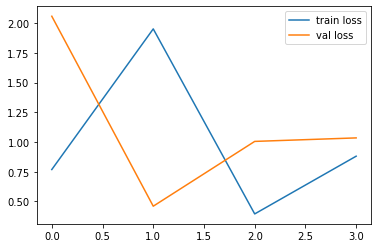

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

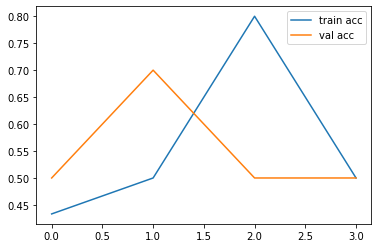

<Figure size 432x288 with 0 Axes>

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('CNI_TL_ImageNet.h5')